In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


**(1) What is the independent variable? What is the dependent variable?**

The **independent variable** is the congruency between the color and the written word. The **dependent variable** is the time that it takes for the user to name the ink colors in equally-sized lists.

**(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

$$ H_{0}: \mu_{Cong}- \mu_{Incong} = 0  $$

$ \mu_{Cong}$ and $  \mu_{Incong}  $ represent the congruent and incongruent population means

Under normal circumstances, it would be assumed that it takes the same amount of time to read each list.
If this hypothesis is proven wrong, then the alternative hypothesis would be true (The stroop effect would be proven true when $ \mu_{Cong}- \mu_{Incong} \leq 0  $)

$$ H_{1}: \mu_{Cong}- \mu_{Incong} \neq 0  $$

This hypothesis states that the times to read the list varies depending on the congruency between the ink and the written word

Given that:
* The sample size is below 30
* Each element in both samples represents the time it took for the same participant to go through each list (related)

To find statistical differences between the two samples a **paired t-test** would be used.

**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [2]:
cd = pd.read_csv("stroopdata.csv")
cd.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The **mean** is:
* **Congruent**: $ mean = 14.05$
* **Incongruent**: $ mean = 22.01$

The Incongruent results have a median almost 8 seconds higher than the Congruent results

The **median** is:
* **Congruent**: $ Q_2 = 14.36$
* **Incongruent**: $ Q_2 = 21.018$

The Incongruent results have a median almost 7 seconds higher than the Congruent results

The **inter quuartile range** is:
* **Congruent**: $ Q_3 - Q_1 = 4.3$
* **Incongruent**: $ Q_3 - Q_1 = 5.35$

For the Congruent results, 50% of the values in the middle are within a smaller range (4.3) than for Incongruent resuls (5.35)

The **standard deviation** is:
* **Congruent**: $ std = 3.56$
* **Incongruent**: $ std = 4.8$

The standard deviation also indicates that the values for the Incongruent results are more spread than for the the Congruent results.


**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

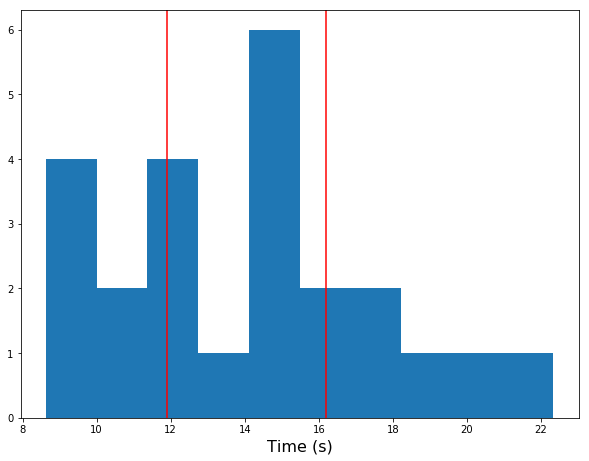

In [3]:
plt.figure(figsize=(10,7.5))
plt.hist(cd['Congruent']);
plt.axvline(cd.quantile(0.25)[0], c='r');
plt.axvline(cd.quantile(0.75)[0], c='r');
plt.xlabel('Time (s)', size=16);

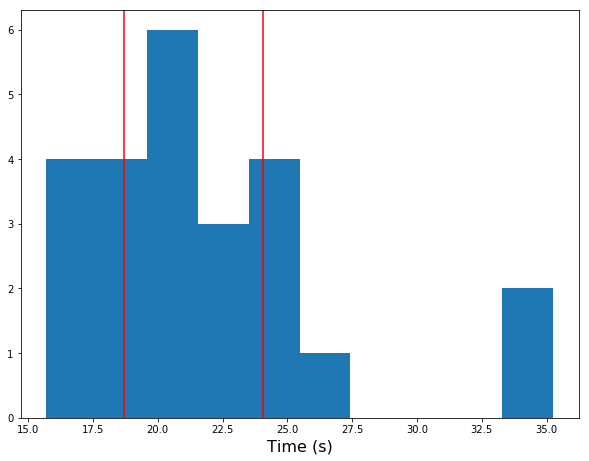

In [4]:
plt.figure(figsize=(10,7.5))
plt.hist(cd['Incongruent']);
plt.axvline(cd.quantile(0.25)[1], c='r')
plt.axvline(cd.quantile(0.75)[1], c='r')
plt.xlabel('Time (s)', size=16);

There is not enough values in the sample to observe the central limit theorem. However, the visualization for the Congruent data seems more normally distributed. The incongruent results seem more skewed to the right and also it has an outlier at 35 s

**(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

The critical statistic value is $\alpha\ = 0.05 $. Given the null Hypothesis is two tailed, it means that p-values smaller than 0.025 would favour the alternative hypothesis.

In [9]:
from scipy import stats as st

In [30]:
st.ttest_rel(cd['Congruent'].values, cd['Incongruent'].values)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

Given the p-value, it seems very unlikely that, being the null hypothesis true, we would obtain such results. Therefore, the null hypothesis is rejected in favour of the Alternative Hypothesis. The Alternative hypothesis states that, there are statistical signifcant differences in the time it takes to read a list depending on the congruency between the ink and the written word.

Proving the alternative hypothesis true does not prove the Stroop effect true, as it only states that the mean of the two samples is different, but it could be either larger or smaller.

The t-values is calculated as follows:$$ t = \frac{\bar{X_1}-\bar{X_2}}{\frac{s_d}{\sqrt{n_1}}}$$

1 . the mean difference is: $\bar{X_1}-\bar{X_2}$

In [27]:
diff = (cd['Congruent'].values-cd['Incongruent'].values)
d = np.mean(diff)
d

-7.9647916666666658

2 . The standard error of the mean difference is: $\frac{s_d}{\sqrt{n_1}}$

In [31]:
se = np.std(diff)/np.sqrt(len(cd))
se

0.97212042717333247

3 . Thus:

In [29]:
t = d/se
t

-8.1932150009707758

As the t-value obtained is negative (-8.19), it shows that $\bar{X_2}$ is larger than $\bar{X_1}$ (as shown in the previous questions). Therefore, on average, it takes longer to read the incongruent list. Having rejected the null hypothesis, the Stroop effect is proven true